In [1]:
get_ipython().system('pip install db-dtypes')

In [2]:
# Let's look at the wage_data table
query = """
SELECT *
FROM `ironhacks-data.ironhacks_competition.wage_data`
"""

In [3]:
query_job = bigquery_client.query(query)
wage_data = query_job.to_dataframe()
wage_data.head(3)

NameError: name 'bigquery_client' is not defined

In [4]:
BIGQUERY_PROJECT = 'ironhacks-data'
bigquery_client = bigquery.Client(project=BIGQUERY_PROJECT)

NameError: name 'bigquery' is not defined

In [5]:
#LIBRARIES
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas import Series, DataFrame
import warnings 
warnings.filterwarnings('ignore')
from scipy import stats  
from google.cloud import bigquery
from google.oauth2 import service_account
from google.cloud.bigquery import magics
from sklearn.impute import SimpleImputer
from sklearn import linear_model
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [6]:
BIGQUERY_PROJECT = 'ironhacks-data'
bigquery_client = bigquery.Client(project=BIGQUERY_PROJECT)

In [7]:
# Let's look at the wage_data table
query = """
SELECT *
FROM `ironhacks-data.ironhacks_competition.wage_data`
"""

In [8]:
query_job = bigquery_client.query(query)
wage_data = query_job.to_dataframe()
wage_data.head(3)

,uu_id,countyfips,tract,tract_name,average_wage
0,585f8731c2255d6b3f817a31180848b9,18177,200,"Census Tract 2, Wayne County, Indiana",6612.00
1,8c9d2aa90948679972a9382aadcc6001,18177,900,"Census Tract 9, Wayne County, Indiana",9883.25
2,0f3d45341a5b113b813ffb7be7f58bab,18183,50300,"Census Tract 503, Whitley County, Indiana",13992.25


In [9]:
# Let's look at the unemployment_data table
query = """
SELECT *
FROM `ironhacks-data.ironhacks_competition.unemployment_data`
"""

In [10]:
query_job = bigquery_client.query(query)
unemployment_data = query_job.to_dataframe()
unemployment_data.head(3)

,uu_id,timeperiod,week_number,countyfips,tract,tract_name,total_claims,edu_8th_or_less,edu_grades_9_11,edu_hs_grad_equiv,...,gender_female,gender_male,gender_na,race_amerindian,race_asian,race_black,race_noanswer,race_hawaiiannative,race_other,race_white
0,f013068de98db1470bd986137a0c6d23,20220416,16,18003,900,"Census Tract 9, Allen County, Indiana",22,0,<NA>,14,...,<NA>,<NA>,0,0,0,11,0,0,<NA>,<NA>
1,21957d5517323845818d87623589e1ba,20220319,12,18089,10400,"Census Tract 104, Lake County, Indiana",111,0,<NA>,108,...,76,35,0,0,0,<NA>,<NA>,0,0,0
2,6a5609f385912113b6f1014b958ed748,20220326,13,18089,11500,"Census Tract 115, Lake County, Indiana",39,0,<NA>,<NA>,...,<NA>,<NA>,0,0,0,39,0,0,0,0


In [11]:
# Let's look at the prediction_list table
query = """
SELECT *
FROM `ironhacks-data.ironhacks_competition.prediction_list`
"""

In [12]:
query_job = bigquery_client.query(query)
prediction_list = query_job.to_dataframe()
prediction_list.head(3)

,uu_id,week_number
0,5bf51fc2e162d6faf9e3cf79e4198378,44
1,420b44cc7e3f55d738df565421e59941,44
2,e39c66ecceec76ee8f9f811fa4a2d246,44


In [13]:
#Let's merge the unemployment_data and wage_data
# We will merge only cols uu_id and average_wage from wage_data into unemployment_data
Merged_unemployment_wage = unemployment_data.merge(wage_data[['uu_id', 'average_wage']])
Merged_unemployment_wage.columns

Index(['uu_id', 'timeperiod', 'week_number', 'countyfips', 'tract',
       'tract_name', 'total_claims', 'edu_8th_or_less', 'edu_grades_9_11',
       'edu_hs_grad_equiv', 'edu_post_hs', 'edu_unknown',
       'top_category_employer1', 'top_category_employer2',
       'top_category_employer3', 'gender_female', 'gender_male', 'gender_na',
       'race_amerindian', 'race_asian', 'race_black', 'race_noanswer',
       'race_hawaiiannative', 'race_other', 'race_white', 'average_wage'],
      dtype='object')

In [14]:
Merged_unemployment_wage.head(3)

,uu_id,timeperiod,week_number,countyfips,tract,tract_name,total_claims,edu_8th_or_less,edu_grades_9_11,edu_hs_grad_equiv,...,gender_male,gender_na,race_amerindian,race_asian,race_black,race_noanswer,race_hawaiiannative,race_other,race_white,average_wage
0,f013068de98db1470bd986137a0c6d23,20220416,16,18003,900,"Census Tract 9, Allen County, Indiana",22,0,<NA>,14,...,<NA>,0,0,0,11,0,0,<NA>,<NA>,8347.125
1,f013068de98db1470bd986137a0c6d23,20220212,7,18003,900,"Census Tract 9, Allen County, Indiana",10,0,0,<NA>,...,<NA>,0,0,0,<NA>,0,0,<NA>,<NA>,8347.125
2,f013068de98db1470bd986137a0c6d23,20220827,35,18003,900,"Census Tract 9, Allen County, Indiana",11,0,<NA>,<NA>,...,<NA>,0,0,0,<NA>,0,0,0,<NA>,8347.125


In [15]:
#Replaced the remaining null values with 0s
cleaned_df = drop_duplicates.fillna(0)

NameError: name 'drop_duplicates' is not defined

In [16]:
#Drop duplicate rows
drop_duplicates = Merged_unemployment_wage.drop_duplicates()

In [17]:
#Replaced the remaining null values with 0s
cleaned_df = drop_duplicates.fillna(0)

In [18]:
#Let's drop the column with no data
Final_df=cleaned_df.drop(['race_hawaiiannative'], axis=1)

In [19]:
#Number of Claims filed
Final_df['uu_id'].value_counts(ascending=True).to_frame()

,uu_id
f7f087af0599e6b2eaa4045ba1a0be50,3
6fbb60a508283bc1fb30c13ac419941a,3
b67c2c4abede3730932f8d53aba0341a,4
747f8bc2b0c8c0a04d29caa4cfe327d2,4
b63efd0868b06138b7c8f9da9027e457,5
...,...
7e2478517261a19d87c0ab2e737fb25f,35
bbcb018f0e5e49e13636f6e78ce9f60f,35
7b208b710114a393f20ec464c7849157,35
b8114861c419dc4c0cdbbc07a943b2b9,35


In [20]:
#Number of Claims filed
Num_of_claims = Final_df['uu_id'].value_counts(ascending=True).to_frame()

In [21]:
#Number of Claims filed
Num_of_claims = Final_df['uu_id'].value_counts(ascending=True).to_frame()
Num_of_claims.head()

,uu_id
f7f087af0599e6b2eaa4045ba1a0be50,3
6fbb60a508283bc1fb30c13ac419941a,3
b67c2c4abede3730932f8d53aba0341a,4
747f8bc2b0c8c0a04d29caa4cfe327d2,4
b63efd0868b06138b7c8f9da9027e457,5


In [22]:
#Top 3 UUID with the max number of claims
Top_10_claimers = Final_df.groupby(['uu_id'])['total_claims'].sum().sort_values(ascending=False)
Top_10_claimers

uu_id
c82ff1f157906a6e9c37a08989544676    2454
0ad94f09274e2c9cb0ef5cb77eb334b4    2067
cb304c84e572423d939db1dbb2009609    1758
46b2882ec4c373527ec33f7bd4f1388d    1665
4ca0a1c6a388982e4526ff6843825010    1626
                                    ... 
b67c2c4abede3730932f8d53aba0341a      65
99c1cb11273b064dc48649886138eb8e      58
f7f087af0599e6b2eaa4045ba1a0be50      46
747f8bc2b0c8c0a04d29caa4cfe327d2      46
6fbb60a508283bc1fb30c13ac419941a      46
Name: total_claims, Length: 525, dtype: Int64

In [23]:
#Top 3 UUID with the max number of claims
Top_claimers = Final_df.groupby(['uu_id'])['total_claims'].sum().sort_values(ascending=False)
Top_claimers

uu_id
c82ff1f157906a6e9c37a08989544676    2454
0ad94f09274e2c9cb0ef5cb77eb334b4    2067
cb304c84e572423d939db1dbb2009609    1758
46b2882ec4c373527ec33f7bd4f1388d    1665
4ca0a1c6a388982e4526ff6843825010    1626
                                    ... 
b67c2c4abede3730932f8d53aba0341a      65
99c1cb11273b064dc48649886138eb8e      58
f7f087af0599e6b2eaa4045ba1a0be50      46
747f8bc2b0c8c0a04d29caa4cfe327d2      46
6fbb60a508283bc1fb30c13ac419941a      46
Name: total_claims, Length: 525, dtype: Int64

In [24]:
#Top 3 UUID with the max number of claims
Top_claimers = Final_df.groupby(['uu_id'])['total_claims'].sum().sort_values(ascending=False)
Top_claimers.head(3)

uu_id
c82ff1f157906a6e9c37a08989544676    2454
0ad94f09274e2c9cb0ef5cb77eb334b4    2067
cb304c84e572423d939db1dbb2009609    1758
Name: total_claims, dtype: Int64

In [25]:
#UUIDs with the least number of claims
Top_claimers.tail(3)

uu_id
f7f087af0599e6b2eaa4045ba1a0be50    46
747f8bc2b0c8c0a04d29caa4cfe327d2    46
6fbb60a508283bc1fb30c13ac419941a    46
Name: total_claims, dtype: Int64

In [26]:
#Top 3 UUID with the max number of claims
Top_claimers = Final_df.groupby(['uu_id'])['total_claims'].sum().sort_values(ascending=False).to_frame()
Top_claimers.head(3)

,total_claims
uu_id,
c82ff1f157906a6e9c37a08989544676,2454
0ad94f09274e2c9cb0ef5cb77eb334b4,2067
cb304c84e572423d939db1dbb2009609,1758


In [27]:
#UUIDs with the least number of claims
Top_claimers.tail(3)

,total_claims
uu_id,
f7f087af0599e6b2eaa4045ba1a0be50,46
747f8bc2b0c8c0a04d29caa4cfe327d2,46
6fbb60a508283bc1fb30c13ac419941a,46


In [28]:
#Top_claimers = Final_df.groupby(['uu_id'])['total_claims'].sum().sort_values(ascending=False).to_frame()
No_claims_after_week_35 = Final_df.groupby(['uu_id'])[Final_df["total_claims"] > 35]

KeyError: 'Columns not found: False, True'

In [29]:
#Top_claimers = Final_df.groupby(['uu_id'])['total_claims'].sum().sort_values(ascending=False).to_frame()
No_claims_after_week_35 = Final_df[Final_df["week_number"] > 35]
No_claims_after_week_35

,uu_id,timeperiod,week_number,countyfips,tract,tract_name,total_claims,edu_8th_or_less,edu_grades_9_11,edu_hs_grad_equiv,...,gender_female,gender_male,gender_na,race_amerindian,race_asian,race_black,race_noanswer,race_other,race_white,average_wage
35,21957d5517323845818d87623589e1ba,20220910,37,18089,10400,"Census Tract 104, Lake County, Indiana",36,0,0,20,...,0,0,0,0,0,25,0,0,0,7036.636364
41,21957d5517323845818d87623589e1ba,20220903,36,18089,10400,"Census Tract 104, Lake County, Indiana",19,0,0,10,...,0,0,0,0,0,15,0,0,0,7036.636364
123,46b2882ec4c373527ec33f7bd4f1388d,20220903,36,18089,20700,"Census Tract 207, Lake County, Indiana",12,0,0,0,...,0,0,0,0,0,0,0,0,0,7534.375000
125,46b2882ec4c373527ec33f7bd4f1388d,20220910,37,18089,20700,"Census Tract 207, Lake County, Indiana",25,0,0,14,...,14,11,0,0,0,17,0,0,0,7534.375000
134,37495d17e82f7df326bfc2c4c090f7b7,20220903,36,18089,21900,"Census Tract 219, Lake County, Indiana",27,0,13,0,...,0,0,0,0,0,0,13,0,0,11825.125000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16771,b25e809679da1728ba3638a9fb418257,20220903,36,18071,967901,"Census Tract 9679.01, Jackson County, Indiana",10,0,0,0,...,0,0,0,0,0,0,0,0,10,10320.285714
16785,b25e809679da1728ba3638a9fb418257,20220910,37,18071,967901,"Census Tract 9679.01, Jackson County, Indiana",10,0,0,0,...,0,0,0,0,0,0,0,0,0,10320.285714
16794,b63901e116eff9653b0bb68135364147,20220910,37,18141,11405,"Census Tract 114.05, St. Joseph County, Indiana",11,0,0,0,...,0,0,0,0,0,0,0,0,0,14410.461538
16806,33f8f477e670b3cac704f4c0faa6e318,20220903,36,18113,971900,"Census Tract 9719, Noble County, Indiana",11,0,0,0,...,0,0,0,0,0,0,0,0,0,17282.764706


In [30]:
#Top_claimers = Final_df.groupby(['uu_id'])['total_claims'].sum().sort_values(ascending=False).to_frame()
No_claims_after_week_35 = Final_df[Final_df["week_number"] < 35]
No_claims_after_week_35

,uu_id,timeperiod,week_number,countyfips,tract,tract_name,total_claims,edu_8th_or_less,edu_grades_9_11,edu_hs_grad_equiv,...,gender_female,gender_male,gender_na,race_amerindian,race_asian,race_black,race_noanswer,race_other,race_white,average_wage
0,f013068de98db1470bd986137a0c6d23,20220416,16,18003,900,"Census Tract 9, Allen County, Indiana",22,0,0,14,...,0,0,0,0,0,11,0,0,0,8347.125000
1,f013068de98db1470bd986137a0c6d23,20220212,7,18003,900,"Census Tract 9, Allen County, Indiana",10,0,0,0,...,0,0,0,0,0,0,0,0,0,8347.125000
3,f013068de98db1470bd986137a0c6d23,20220312,11,18003,900,"Census Tract 9, Allen County, Indiana",11,0,0,0,...,0,0,0,0,0,0,0,0,0,8347.125000
4,f013068de98db1470bd986137a0c6d23,20220205,6,18003,900,"Census Tract 9, Allen County, Indiana",11,0,0,0,...,0,0,0,0,0,0,0,0,0,8347.125000
5,f013068de98db1470bd986137a0c6d23,20220305,10,18003,900,"Census Tract 9, Allen County, Indiana",14,0,0,0,...,0,0,0,0,0,0,0,0,0,8347.125000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16828,33f8f477e670b3cac704f4c0faa6e318,20220305,10,18113,971900,"Census Tract 9719, Noble County, Indiana",11,0,0,0,...,0,0,0,0,0,0,0,0,0,17282.764706
16829,33f8f477e670b3cac704f4c0faa6e318,20220205,6,18113,971900,"Census Tract 9719, Noble County, Indiana",10,0,0,0,...,0,0,0,0,0,0,0,0,0,17282.764706
16830,33f8f477e670b3cac704f4c0faa6e318,20220730,31,18113,971900,"Census Tract 9719, Noble County, Indiana",16,0,0,10,...,0,0,0,0,0,0,0,0,0,17282.764706
16831,33f8f477e670b3cac704f4c0faa6e318,20220226,9,18113,971900,"Census Tract 9719, Noble County, Indiana",23,0,0,19,...,0,0,0,0,0,0,0,0,0,17282.764706


In [31]:
#Top_claimers = Final_df.groupby(['uu_id'])['total_claims'].sum().sort_values(ascending=False).to_frame()
No_claims_after_week_35 = Final_df[Final_df["week_number"] > 35]
No_claims_after_week_35

,uu_id,timeperiod,week_number,countyfips,tract,tract_name,total_claims,edu_8th_or_less,edu_grades_9_11,edu_hs_grad_equiv,...,gender_female,gender_male,gender_na,race_amerindian,race_asian,race_black,race_noanswer,race_other,race_white,average_wage
35,21957d5517323845818d87623589e1ba,20220910,37,18089,10400,"Census Tract 104, Lake County, Indiana",36,0,0,20,...,0,0,0,0,0,25,0,0,0,7036.636364
41,21957d5517323845818d87623589e1ba,20220903,36,18089,10400,"Census Tract 104, Lake County, Indiana",19,0,0,10,...,0,0,0,0,0,15,0,0,0,7036.636364
123,46b2882ec4c373527ec33f7bd4f1388d,20220903,36,18089,20700,"Census Tract 207, Lake County, Indiana",12,0,0,0,...,0,0,0,0,0,0,0,0,0,7534.375000
125,46b2882ec4c373527ec33f7bd4f1388d,20220910,37,18089,20700,"Census Tract 207, Lake County, Indiana",25,0,0,14,...,14,11,0,0,0,17,0,0,0,7534.375000
134,37495d17e82f7df326bfc2c4c090f7b7,20220903,36,18089,21900,"Census Tract 219, Lake County, Indiana",27,0,13,0,...,0,0,0,0,0,0,13,0,0,11825.125000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16771,b25e809679da1728ba3638a9fb418257,20220903,36,18071,967901,"Census Tract 9679.01, Jackson County, Indiana",10,0,0,0,...,0,0,0,0,0,0,0,0,10,10320.285714
16785,b25e809679da1728ba3638a9fb418257,20220910,37,18071,967901,"Census Tract 9679.01, Jackson County, Indiana",10,0,0,0,...,0,0,0,0,0,0,0,0,0,10320.285714
16794,b63901e116eff9653b0bb68135364147,20220910,37,18141,11405,"Census Tract 114.05, St. Joseph County, Indiana",11,0,0,0,...,0,0,0,0,0,0,0,0,0,14410.461538
16806,33f8f477e670b3cac704f4c0faa6e318,20220903,36,18113,971900,"Census Tract 9719, Noble County, Indiana",11,0,0,0,...,0,0,0,0,0,0,0,0,0,17282.764706


In [32]:
#Top_claimers = Final_df.groupby(['uu_id'])['total_claims'].sum().sort_values(ascending=False).to_frame()
No_claims_after_week_35 = Final_df[Final_df["week_number"] > 35]
No_claims_after_week_35.unique.uu_id

AttributeError: 'DataFrame' object has no attribute 'unique'

In [33]:
#Top_claimers = Final_df.groupby(['uu_id'])['total_claims'].sum().sort_values(ascending=False).to_frame()
No_claims_after_week_35 = Final_df[Final_df["week_number"] > 35]
No_claims_after_week_35.nunique.uu_id

AttributeError: 'function' object has no attribute 'uu_id'

In [34]:
#Top_claimers = Final_df.groupby(['uu_id'])['total_claims'].sum().sort_values(ascending=False).to_frame()
No_claims_after_week_35 = Final_df[Final_df["week_number"] > 35]
No_claims_after_week_35.uu_id.unique()

array(['21957d5517323845818d87623589e1ba',
       '46b2882ec4c373527ec33f7bd4f1388d',
       '37495d17e82f7df326bfc2c4c090f7b7',
       '25a57fe39e03c632125308737a7d3769',
       '45c8cf419dd4c4b442dbf3603ba94379',
       '8f782a6153268c6031e31784e2d4eae2',
       '5c04f20bd2f8552aa7ac210dc01292fb',
       'bc7ebe1813e2b66f084289e1b1172f21',
       '6239669cbfe444abd0a46536a670d150',
       '6657c9871fa2f67cd168e6f94354060e',
       '7df3e38fbdab0a32ca0fa9fb6c8bd8c4',
       'e8f426c17a7172179be379cb926bd278',
       '3934b01a1e31d0a6af96867e1afbf03c',
       '5e9480dba0f8de932f4d9fb55fa6b8b1',
       '1bd2241076381b8c9e85d660512a013e',
       '196c37e49c98e0b8cdd142c001431a7a',
       '8ed377ac3767ffda176fcdea40bcd7e4',
       'c06321bd819be6f5c537c67a2797bd12',
       '06e492b4f29d153af26c659d1f7da2a1',
       '53405bf66812a9f2623a307de572c11e',
       'bf9e1cf78ce5a29fb59c7e634d596263',
       'f43fb9e90c5ecf879016b159aaa17fcb',
       'bd42c9bae54ed298a8281caf7b699ff6',
       'cfe

In [35]:
#Top_claimers = Final_df.groupby(['uu_id'])['total_claims'].sum().sort_values(ascending=False).to_frame()
No_claims_after_week_35 = Final_df[Final_df["week_number"] > 35]
array1 = No_claims_after_week_35.uu_id.unique()

In [36]:
#Top_claimers = Final_df.groupby(['uu_id'])['total_claims'].sum().sort_values(ascending=False).to_frame()
No_claims_after_week_35 = Final_df[Final_df["week_number"] > 35]
array1 = No_claims_after_week_35.uu_id.unique()
array1

array(['21957d5517323845818d87623589e1ba',
       '46b2882ec4c373527ec33f7bd4f1388d',
       '37495d17e82f7df326bfc2c4c090f7b7',
       '25a57fe39e03c632125308737a7d3769',
       '45c8cf419dd4c4b442dbf3603ba94379',
       '8f782a6153268c6031e31784e2d4eae2',
       '5c04f20bd2f8552aa7ac210dc01292fb',
       'bc7ebe1813e2b66f084289e1b1172f21',
       '6239669cbfe444abd0a46536a670d150',
       '6657c9871fa2f67cd168e6f94354060e',
       '7df3e38fbdab0a32ca0fa9fb6c8bd8c4',
       'e8f426c17a7172179be379cb926bd278',
       '3934b01a1e31d0a6af96867e1afbf03c',
       '5e9480dba0f8de932f4d9fb55fa6b8b1',
       '1bd2241076381b8c9e85d660512a013e',
       '196c37e49c98e0b8cdd142c001431a7a',
       '8ed377ac3767ffda176fcdea40bcd7e4',
       'c06321bd819be6f5c537c67a2797bd12',
       '06e492b4f29d153af26c659d1f7da2a1',
       '53405bf66812a9f2623a307de572c11e',
       'bf9e1cf78ce5a29fb59c7e634d596263',
       'f43fb9e90c5ecf879016b159aaa17fcb',
       'bd42c9bae54ed298a8281caf7b699ff6',
       'cfe

In [37]:
array2 = Final_df.uu_id.unique()
array2

array(['f013068de98db1470bd986137a0c6d23',
       '21957d5517323845818d87623589e1ba',
       '6a5609f385912113b6f1014b958ed748',
       '46b2882ec4c373527ec33f7bd4f1388d',
       '37495d17e82f7df326bfc2c4c090f7b7',
       '25a57fe39e03c632125308737a7d3769',
       '45c8cf419dd4c4b442dbf3603ba94379',
       '8f782a6153268c6031e31784e2d4eae2',
       '5c04f20bd2f8552aa7ac210dc01292fb',
       '050a624d618a68e43fe31189909c644f',
       'bc7ebe1813e2b66f084289e1b1172f21',
       '6239669cbfe444abd0a46536a670d150',
       '6657c9871fa2f67cd168e6f94354060e',
       '7df3e38fbdab0a32ca0fa9fb6c8bd8c4',
       'e8f426c17a7172179be379cb926bd278',
       '3934b01a1e31d0a6af96867e1afbf03c',
       '5e9480dba0f8de932f4d9fb55fa6b8b1',
       '1bd2241076381b8c9e85d660512a013e',
       '196c37e49c98e0b8cdd142c001431a7a',
       '8ed377ac3767ffda176fcdea40bcd7e4',
       'c06321bd819be6f5c537c67a2797bd12',
       '06e492b4f29d153af26c659d1f7da2a1',
       '53405bf66812a9f2623a307de572c11e',
       'bf9

In [38]:
array2 = np.array(Final_df.uu_id.unique())
array2

array(['f013068de98db1470bd986137a0c6d23',
       '21957d5517323845818d87623589e1ba',
       '6a5609f385912113b6f1014b958ed748',
       '46b2882ec4c373527ec33f7bd4f1388d',
       '37495d17e82f7df326bfc2c4c090f7b7',
       '25a57fe39e03c632125308737a7d3769',
       '45c8cf419dd4c4b442dbf3603ba94379',
       '8f782a6153268c6031e31784e2d4eae2',
       '5c04f20bd2f8552aa7ac210dc01292fb',
       '050a624d618a68e43fe31189909c644f',
       'bc7ebe1813e2b66f084289e1b1172f21',
       '6239669cbfe444abd0a46536a670d150',
       '6657c9871fa2f67cd168e6f94354060e',
       '7df3e38fbdab0a32ca0fa9fb6c8bd8c4',
       'e8f426c17a7172179be379cb926bd278',
       '3934b01a1e31d0a6af96867e1afbf03c',
       '5e9480dba0f8de932f4d9fb55fa6b8b1',
       '1bd2241076381b8c9e85d660512a013e',
       '196c37e49c98e0b8cdd142c001431a7a',
       '8ed377ac3767ffda176fcdea40bcd7e4',
       'c06321bd819be6f5c537c67a2797bd12',
       '06e492b4f29d153af26c659d1f7da2a1',
       '53405bf66812a9f2623a307de572c11e',
       'bf9

In [39]:
#Top_claimers = Final_df.groupby(['uu_id'])['total_claims'].sum().sort_values(ascending=False).to_frame()
No_claims_after_week_35 = Final_df[Final_df["week_number"] > 35]
array1 = np.array(No_claims_after_week_35.uu_id.unique())
array1

array(['21957d5517323845818d87623589e1ba',
       '46b2882ec4c373527ec33f7bd4f1388d',
       '37495d17e82f7df326bfc2c4c090f7b7',
       '25a57fe39e03c632125308737a7d3769',
       '45c8cf419dd4c4b442dbf3603ba94379',
       '8f782a6153268c6031e31784e2d4eae2',
       '5c04f20bd2f8552aa7ac210dc01292fb',
       'bc7ebe1813e2b66f084289e1b1172f21',
       '6239669cbfe444abd0a46536a670d150',
       '6657c9871fa2f67cd168e6f94354060e',
       '7df3e38fbdab0a32ca0fa9fb6c8bd8c4',
       'e8f426c17a7172179be379cb926bd278',
       '3934b01a1e31d0a6af96867e1afbf03c',
       '5e9480dba0f8de932f4d9fb55fa6b8b1',
       '1bd2241076381b8c9e85d660512a013e',
       '196c37e49c98e0b8cdd142c001431a7a',
       '8ed377ac3767ffda176fcdea40bcd7e4',
       'c06321bd819be6f5c537c67a2797bd12',
       '06e492b4f29d153af26c659d1f7da2a1',
       '53405bf66812a9f2623a307de572c11e',
       'bf9e1cf78ce5a29fb59c7e634d596263',
       'f43fb9e90c5ecf879016b159aaa17fcb',
       'bd42c9bae54ed298a8281caf7b699ff6',
       'cfe

In [40]:
print("Unique values in array2 that are not in array1:")
print(np.setxor1d(array1, array2))

Unique values in array2 that are not in array1:
['050a624d618a68e43fe31189909c644f' '074f501122885ab9aef5e9d07004209d'
 '0dc217a2798a141c59b99f5bcff29fa9' '0e6523fb3fc17f6a2ac7050972bd4bfd'
 '2b6b2f2e6d3340e7d9ae46cd41eaef1b' '2ce8c1fbabbed69343d1af45e99c4839'
 '38e264ca88c300dc19938de0abc88ec4' '3b64b154b842527478b03e19c11e300b'
 '420b44cc7e3f55d738df565421e59941' '47ef7e3c1efab409502a8e4c675654f6'
 '47f0290645712229fd4f8f1fe7dc6b05' '4a6ae3b5be1b9b7c10c177e1b9fded82'
 '4f38233021d41195c29f0a206e75a77e' '50088293eaca82f8c05e74c7aa38733f'
 '585f8731c2255d6b3f817a31180848b9' '5a9758f65f001b6432ff31ff64a459d7'
 '5bf51fc2e162d6faf9e3cf79e4198378' '6505dba31a2e5fa96251a7ba5d2fc1a0'
 '65c933853ba6f9ad80097936c2924aa6' '65f24aac652de33abaf3f227b41e2641'
 '666c7361f0603c0cb4b783beddb796d8' '676fffaaecefffe4ce93ca264c5c3c36'
 '68e5bdd9fde563b534c8a38dfddb6146' '6a5609f385912113b6f1014b958ed748'
 '7a3c45dff186e7416bc95abd6668f65b' '7ab86f26bdf5e743b0f0adf08df559e3'
 '7b67eb2512a721025efe5cb967a

In [41]:
print(np.setxor1d(array1, array2))

['050a624d618a68e43fe31189909c644f' '074f501122885ab9aef5e9d07004209d'
 '0dc217a2798a141c59b99f5bcff29fa9' '0e6523fb3fc17f6a2ac7050972bd4bfd'
 '2b6b2f2e6d3340e7d9ae46cd41eaef1b' '2ce8c1fbabbed69343d1af45e99c4839'
 '38e264ca88c300dc19938de0abc88ec4' '3b64b154b842527478b03e19c11e300b'
 '420b44cc7e3f55d738df565421e59941' '47ef7e3c1efab409502a8e4c675654f6'
 '47f0290645712229fd4f8f1fe7dc6b05' '4a6ae3b5be1b9b7c10c177e1b9fded82'
 '4f38233021d41195c29f0a206e75a77e' '50088293eaca82f8c05e74c7aa38733f'
 '585f8731c2255d6b3f817a31180848b9' '5a9758f65f001b6432ff31ff64a459d7'
 '5bf51fc2e162d6faf9e3cf79e4198378' '6505dba31a2e5fa96251a7ba5d2fc1a0'
 '65c933853ba6f9ad80097936c2924aa6' '65f24aac652de33abaf3f227b41e2641'
 '666c7361f0603c0cb4b783beddb796d8' '676fffaaecefffe4ce93ca264c5c3c36'
 '68e5bdd9fde563b534c8a38dfddb6146' '6a5609f385912113b6f1014b958ed748'
 '7a3c45dff186e7416bc95abd6668f65b' '7ab86f26bdf5e743b0f0adf08df559e3'
 '7b67eb2512a721025efe5cb967a38aff' '8cc5579ada546380bcf2663e0692e520'
 '96b3

In [42]:
#f7f087af0599e6b2eaa4045ba1a0be50  - Yes  
#747f8bc2b0c8c0a04d29caa4cfe327d2  - No  
#6fbb60a508283bc1fb30c13ac419941a  - No  
#b67c2c4abede3730932f8d53aba0341a  - No
uuid5 = Final_df[Final_df['uu_id']=='050a624d618a68e43fe31189909c644f'].sort_values('week_number')
uuid5

,uu_id,timeperiod,week_number,countyfips,tract,tract_name,total_claims,edu_8th_or_less,edu_grades_9_11,edu_hs_grad_equiv,...,gender_female,gender_male,gender_na,race_amerindian,race_asian,race_black,race_noanswer,race_other,race_white,average_wage
326,050a624d618a68e43fe31189909c644f,20220101,1,18067,700,"Census Tract 7, Howard County, Indiana",15,0,0,0,...,0,0,0,0,0,0,0,0,0,17452.0
337,050a624d618a68e43fe31189909c644f,20220108,2,18067,700,"Census Tract 7, Howard County, Indiana",15,0,0,0,...,0,0,0,0,0,0,0,0,11,17452.0
346,050a624d618a68e43fe31189909c644f,20220115,3,18067,700,"Census Tract 7, Howard County, Indiana",25,0,0,16,...,0,0,0,0,0,0,0,0,0,17452.0
321,050a624d618a68e43fe31189909c644f,20220129,5,18067,700,"Census Tract 7, Howard County, Indiana",26,0,0,0,...,0,0,0,0,0,0,0,0,0,17452.0
324,050a624d618a68e43fe31189909c644f,20220205,6,18067,700,"Census Tract 7, Howard County, Indiana",12,0,0,0,...,0,0,0,0,0,0,0,0,0,17452.0
325,050a624d618a68e43fe31189909c644f,20220212,7,18067,700,"Census Tract 7, Howard County, Indiana",19,0,0,0,...,0,0,0,0,0,0,0,0,0,17452.0
322,050a624d618a68e43fe31189909c644f,20220219,8,18067,700,"Census Tract 7, Howard County, Indiana",16,0,0,10,...,0,0,0,0,0,0,0,0,12,17452.0
319,050a624d618a68e43fe31189909c644f,20220305,10,18067,700,"Census Tract 7, Howard County, Indiana",20,0,0,13,...,0,0,0,0,0,0,0,0,0,17452.0
323,050a624d618a68e43fe31189909c644f,20220312,11,18067,700,"Census Tract 7, Howard County, Indiana",17,0,0,11,...,0,0,0,0,0,0,0,0,0,17452.0
347,050a624d618a68e43fe31189909c644f,20220319,12,18067,700,"Census Tract 7, Howard County, Indiana",27,0,0,13,...,14,0,0,0,0,0,0,0,0,17452.0


In [43]:
#f7f087af0599e6b2eaa4045ba1a0be50  - Yes  
#747f8bc2b0c8c0a04d29caa4cfe327d2  - No  
#6fbb60a508283bc1fb30c13ac419941a  - No  
#b67c2c4abede3730932f8d53aba0341a  - No
uuid5 = Final_df[Final_df['uu_id']=='050a624d618a68e43fe31189909c644f'].sort_values('week_number')
uuid5.tail(3)

,uu_id,timeperiod,week_number,countyfips,tract,tract_name,total_claims,edu_8th_or_less,edu_grades_9_11,edu_hs_grad_equiv,...,gender_female,gender_male,gender_na,race_amerindian,race_asian,race_black,race_noanswer,race_other,race_white,average_wage
329,050a624d618a68e43fe31189909c644f,20220813,33,18067,700,"Census Tract 7, Howard County, Indiana",45,0,0,0,...,0,0,0,0,0,0,0,0,38,17452.0
327,050a624d618a68e43fe31189909c644f,20220820,34,18067,700,"Census Tract 7, Howard County, Indiana",41,0,0,26,...,19,22,0,0,0,0,0,0,33,17452.0
336,050a624d618a68e43fe31189909c644f,20220827,35,18067,700,"Census Tract 7, Howard County, Indiana",36,0,0,20,...,14,22,0,0,0,0,0,0,28,17452.0


In [44]:
#c82ff1f157906a6e9c37a08989544676    
#0ad94f09274e2c9cb0ef5cb77eb334b4    
#cb304c84e572423d939db1dbb2009609
uuid4 = Final_df[Final_df['uu_id']=='cb304c84e572423d939db1dbb2009609'].sort_values('week_number')
uuid4.tail(3)

,uu_id,timeperiod,week_number,countyfips,tract,tract_name,total_claims,edu_8th_or_less,edu_grades_9_11,edu_hs_grad_equiv,...,gender_female,gender_male,gender_na,race_amerindian,race_asian,race_black,race_noanswer,race_other,race_white,average_wage
5812,cb304c84e572423d939db1dbb2009609,20220827,35,18089,10201,"Census Tract 102.01, Lake County, Indiana",30,0,0,0,...,18,12,0,0,0,21,0,0,0,5080.9375
5797,cb304c84e572423d939db1dbb2009609,20220903,36,18089,10201,"Census Tract 102.01, Lake County, Indiana",31,0,0,10,...,16,15,0,0,0,25,0,0,0,5080.9375
5819,cb304c84e572423d939db1dbb2009609,20220910,37,18089,10201,"Census Tract 102.01, Lake County, Indiana",33,0,0,17,...,22,11,0,0,0,23,0,0,0,5080.9375


In [45]:
#c82ff1f157906a6e9c37a08989544676    
#0ad94f09274e2c9cb0ef5cb77eb334b4    
#cb304c84e572423d939db1dbb2009609
uuid3 = Final_df[Final_df['uu_id']=='0ad94f09274e2c9cb0ef5cb77eb334b4'].sort_values('week_number')
uuid3.tail(3)

,uu_id,timeperiod,week_number,countyfips,tract,tract_name,total_claims,edu_8th_or_less,edu_grades_9_11,edu_hs_grad_equiv,...,gender_female,gender_male,gender_na,race_amerindian,race_asian,race_black,race_noanswer,race_other,race_white,average_wage
7129,0ad94f09274e2c9cb0ef5cb77eb334b4,20220827,35,18097,380100,"Census Tract 3801, Marion County, Indiana",36,0,0,11,...,20,16,0,0,0,12,0,0,24,13343.217391
7145,0ad94f09274e2c9cb0ef5cb77eb334b4,20220903,36,18097,380100,"Census Tract 3801, Marion County, Indiana",73,0,11,42,...,55,18,0,0,0,17,0,0,56,13343.217391
7156,0ad94f09274e2c9cb0ef5cb77eb334b4,20220910,37,18097,380100,"Census Tract 3801, Marion County, Indiana",42,0,0,0,...,20,22,0,0,0,0,0,0,34,13343.217391


In [46]:
#c82ff1f157906a6e9c37a08989544676    
#0ad94f09274e2c9cb0ef5cb77eb334b4    
#cb304c84e572423d939db1dbb2009609
uuid2 = Final_df[Final_df['uu_id']=='c82ff1f157906a6e9c37a08989544676'].sort_values('week_number')
uuid2.tail(3)

,uu_id,timeperiod,week_number,countyfips,tract,tract_name,total_claims,edu_8th_or_less,edu_grades_9_11,edu_hs_grad_equiv,...,gender_female,gender_male,gender_na,race_amerindian,race_asian,race_black,race_noanswer,race_other,race_white,average_wage
11496,c82ff1f157906a6e9c37a08989544676,20220827,35,18097,330202,"Census Tract 3302.02, Marion County, Indiana",56,0,0,27,...,38,18,0,0,0,45,0,0,0,9974.333333
11473,c82ff1f157906a6e9c37a08989544676,20220903,36,18097,330202,"Census Tract 3302.02, Marion County, Indiana",75,0,0,51,...,64,11,0,0,0,41,0,0,30,9974.333333
11489,c82ff1f157906a6e9c37a08989544676,20220910,37,18097,330202,"Census Tract 3302.02, Marion County, Indiana",43,0,0,18,...,29,14,0,0,0,30,0,0,0,9974.333333


In [47]:
#Final_df.loc[Merged_unemployment_wage['uu_id'] == 'f013068de98db1470bd986137a0c6d23'].sort_values('week_number')
uuid1 = Final_df[Final_df['uu_id']=='f013068de98db1470bd986137a0c6d23'].sort_values('week_number')
#uuid1['timeperiod'] = pd.to_datetime(uuid1['timeperiod'],
#                          format='%Y%m%d') 
uuid1.tail(3)

,uu_id,timeperiod,week_number,countyfips,tract,tract_name,total_claims,edu_8th_or_less,edu_grades_9_11,edu_hs_grad_equiv,...,gender_female,gender_male,gender_na,race_amerindian,race_asian,race_black,race_noanswer,race_other,race_white,average_wage
15,f013068de98db1470bd986137a0c6d23,20220813,33,18003,900,"Census Tract 9, Allen County, Indiana",29,0,0,0,...,0,0,0,0,0,0,0,0,0,8347.125
12,f013068de98db1470bd986137a0c6d23,20220820,34,18003,900,"Census Tract 9, Allen County, Indiana",15,0,0,10,...,0,0,0,0,0,0,0,0,0,8347.125
2,f013068de98db1470bd986137a0c6d23,20220827,35,18003,900,"Census Tract 9, Allen County, Indiana",11,0,0,0,...,0,0,0,0,0,0,0,0,0,8347.125


In [48]:
#f7f087af0599e6b2eaa4045ba1a0be50  - Yes  
#747f8bc2b0c8c0a04d29caa4cfe327d2  - No  
#6fbb60a508283bc1fb30c13ac419941a  - No  
#b67c2c4abede3730932f8d53aba0341a  - No
uuid5 = Final_df[Final_df['uu_id']=='f7f087af0599e6b2eaa4045ba1a0be50'].sort_values('week_number')
uuid5.tail(3)

,uu_id,timeperiod,week_number,countyfips,tract,tract_name,total_claims,edu_8th_or_less,edu_grades_9_11,edu_hs_grad_equiv,...,gender_female,gender_male,gender_na,race_amerindian,race_asian,race_black,race_noanswer,race_other,race_white,average_wage
8698,f7f087af0599e6b2eaa4045ba1a0be50,20220319,12,18099,20400,"Census Tract 204, Marshall County, Indiana",11,0,0,0,...,0,0,0,0,0,0,0,0,0,12010.6
8697,f7f087af0599e6b2eaa4045ba1a0be50,20220730,31,18099,20400,"Census Tract 204, Marshall County, Indiana",25,0,0,0,...,0,0,0,0,0,0,0,0,25,12010.6
8695,f7f087af0599e6b2eaa4045ba1a0be50,20220813,33,18099,20400,"Census Tract 204, Marshall County, Indiana",10,0,0,0,...,0,0,0,0,0,0,0,0,10,12010.6


In [49]:
uuid6 = Final_df[Final_df['uu_id']=='747f8bc2b0c8c0a04d29caa4cfe327d2'].sort_values('week_number')
uuid6.tail(3)

,uu_id,timeperiod,week_number,countyfips,tract,tract_name,total_claims,edu_8th_or_less,edu_grades_9_11,edu_hs_grad_equiv,...,gender_female,gender_male,gender_na,race_amerindian,race_asian,race_black,race_noanswer,race_other,race_white,average_wage
13268,747f8bc2b0c8c0a04d29caa4cfe327d2,20220205,6,18057,110201,"Census Tract 1102.01, Hamilton County, Indiana",11,0,0,0,...,0,0,0,0,0,0,0,0,0,21175.0
13270,747f8bc2b0c8c0a04d29caa4cfe327d2,20220820,34,18057,110201,"Census Tract 1102.01, Hamilton County, Indiana",12,0,0,0,...,0,0,0,0,0,0,0,0,12,21175.0
13266,747f8bc2b0c8c0a04d29caa4cfe327d2,20220903,36,18057,110201,"Census Tract 1102.01, Hamilton County, Indiana",10,0,0,0,...,0,0,0,0,0,0,0,0,10,21175.0


In [50]:
total_claims_prediction.dtypes

NameError: name 'total_claims_prediction' is not defined

In [51]:
Final_df['prediction_total_claims'] = Predicted_Values.tolist()
Final_df.head()

NameError: name 'Predicted_Values' is not defined

In [52]:
df_numerics_only = Final_df.select_dtypes(include=np.number)
df_numerics_only

,timeperiod,week_number,countyfips,tract,total_claims,edu_8th_or_less,edu_grades_9_11,edu_hs_grad_equiv,edu_post_hs,edu_unknown,gender_female,gender_male,gender_na,race_amerindian,race_asian,race_black,race_noanswer,race_other,race_white,average_wage
0,20220416,16,18003,900,22,0,0,14,0,0,0,0,0,0,0,11,0,0,0,8347.125000
1,20220212,7,18003,900,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8347.125000
2,20220827,35,18003,900,11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8347.125000
3,20220312,11,18003,900,11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8347.125000
4,20220205,6,18003,900,11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8347.125000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16828,20220305,10,18113,971900,11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,17282.764706
16829,20220205,6,18113,971900,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,17282.764706
16830,20220730,31,18113,971900,16,0,0,10,0,0,0,0,0,0,0,0,0,0,0,17282.764706
16831,20220226,9,18113,971900,23,0,0,19,0,0,0,0,0,0,0,0,0,0,0,17282.764706


In [53]:
#df =df_numerics_only.drop(['week_number'], axis=1)
df = Final_df[['week_number','edu_8th_or_less',
       'edu_grades_9_11', 'edu_hs_grad_equiv', 'edu_post_hs', 'edu_unknown',
       'gender_female', 'gender_male', 'gender_na',
       'race_amerindian', 'race_asian', 'race_black', 'race_noanswer',
       'race_other', 'race_white', 'average_wage', 'total_claims']].sort_values('week_number')
df

,week_number,edu_8th_or_less,edu_grades_9_11,edu_hs_grad_equiv,edu_post_hs,edu_unknown,gender_female,gender_male,gender_na,race_amerindian,race_asian,race_black,race_noanswer,race_other,race_white,average_wage,total_claims
12509,1,0,0,11,0,0,0,0,0,0,0,0,0,0,0,11464.000000,21
3901,1,0,0,11,0,0,0,0,0,0,0,0,0,0,16,9916.727273,23
13474,1,0,0,0,18,0,18,15,0,0,0,11,0,0,18,13199.818182,33
3871,1,0,0,0,0,0,0,19,0,0,0,0,0,0,19,18145.285714,19
12092,1,0,0,28,25,0,39,21,0,0,0,53,0,0,0,7539.333333,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13052,37,0,0,0,14,0,12,13,0,0,0,0,0,0,18,12882.555556,25
1642,37,0,0,0,0,0,0,0,0,0,0,11,0,0,0,10415.545455,18
15340,37,0,0,0,0,0,0,0,0,0,0,0,0,0,0,18272.333333,13
14168,37,0,0,0,24,0,0,0,0,0,0,0,0,0,0,13439.833333,29


In [54]:
features = df.iloc[:,:-1]
features.head()

,week_number,edu_8th_or_less,edu_grades_9_11,edu_hs_grad_equiv,edu_post_hs,edu_unknown,gender_female,gender_male,gender_na,race_amerindian,race_asian,race_black,race_noanswer,race_other,race_white,average_wage
12509,1,0,0,11,0,0,0,0,0,0,0,0,0,0,0,11464.000000
3901,1,0,0,11,0,0,0,0,0,0,0,0,0,0,16,9916.727273
13474,1,0,0,0,18,0,18,15,0,0,0,11,0,0,18,13199.818182
3871,1,0,0,0,0,0,0,19,0,0,0,0,0,0,19,18145.285714
12092,1,0,0,28,25,0,39,21,0,0,0,53,0,0,0,7539.333333


In [55]:
X = features.values
X

array([[1, 0, 0, ..., 0, 0, 11464.0],
       [1, 0, 0, ..., 0, 16, 9916.727272727272],
       [1, 0, 0, ..., 0, 18, 13199.818181818182],
       ...,
       [37, 0, 0, ..., 0, 0, 18272.333333333332],
       [37, 0, 0, ..., 0, 0, 13439.833333333334],
       [37, 0, 0, ..., 0, 0, 11465.714285714286]], dtype=object)

In [56]:
y = df['total_claims'].values
y

<IntegerArray>
[21, 23, 33, 19, 60, 10, 15, 16, 11, 15,
 ...
 15, 31, 14, 26, 11, 25, 18, 13, 29, 14]
Length: 13977, dtype: Int64

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [58]:
X_train, X_test, y_train, y_test

(array([[19, 0, 0, ..., 0, 0, 10198.0],
        [8, 0, 0, ..., 0, 0, 9779.5625],
        [27, 0, 0, ..., 0, 0, 6663.714285714285],
        ...,
        [27, 0, 0, ..., 0, 0, 9514.75],
        [30, 0, 0, ..., 0, 19, 13105.857142857143],
        [7, 0, 0, ..., 0, 17, 4916.333333333333]], dtype=object),
 array([[10, 0, 0, ..., 0, 24, 14623.272727272728],
        [31, 0, 0, ..., 0, 0, 11857.42857142857],
        [37, 0, 0, ..., 0, 0, 8939.666666666666],
        ...,
        [20, 0, 35, ..., 0, 0, 13119.0],
        [18, 0, 0, ..., 0, 31, 15658.26923076923],
        [21, 0, 0, ..., 0, 0, 9464.166666666666]], dtype=object),
 <IntegerArray>
 [13, 46, 51, 18, 23, 13, 13, 34, 10, 44,
  ...
  35, 14, 17, 10, 10, 10, 44, 11, 19, 31]
 Length: 11181, dtype: Int64,
 <IntegerArray>
 [30, 17, 23, 41, 11, 31, 34, 26, 16, 16,
  ...
  45, 82, 25, 10, 20, 16, 28, 49, 31, 15]
 Length: 2796, dtype: Int64)

In [59]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

LinearRegression()

In [60]:
y_train_pred = regressor.predict(X_train)
y_train_pred

array([13.289563  , 41.27041892, 38.19311799, ..., 13.269695  ,
       22.24507447, 32.19721342])

In [61]:
regressor.score(X_train, y_train) 

0.8779693079546615

In [62]:
y_test_pred = regressor.predict(X_test)
y_test_pred

array([31.76356933, 15.95839749, 27.52235447, ..., 44.25544378,
       32.71002109, 13.29318808])

In [63]:
regressor.score(X_test, y_test)

0.888874513174282

In [64]:
df_actual_pred = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

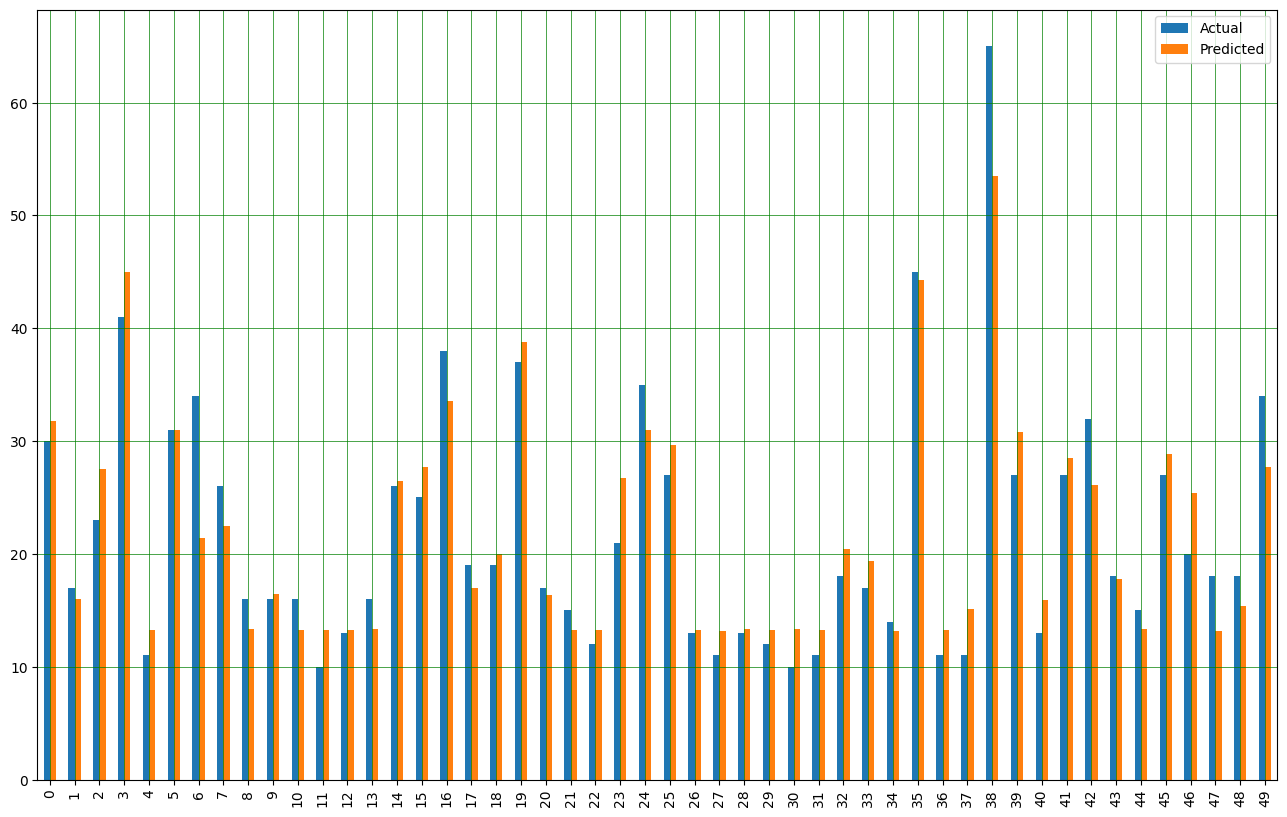

In [65]:
df1 = df_actual_pred.head(50)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [66]:
print(f'Mean Absolute Error: {round(metrics.mean_absolute_error(y_test, y_test_pred),2)}')  
print(f'Mean Squared Error: {round(metrics.mean_squared_error(y_test, y_test_pred),2)}')  
print(f'Root Mean Squared Error: {round(np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)),2)}')

Mean Absolute Error: 3.25
Mean Squared Error: 25.32
Root Mean Squared Error: 5.03


In [67]:
regressor.predict(X_test)

array([31.76356933, 15.95839749, 27.52235447, ..., 44.25544378,
       32.71002109, 13.29318808])

In [68]:
Predicted_Values = regressor.predict(X)
Predicted_Values

array([18.93618596, 22.04556923, 34.3471833 , ..., 13.09817974,
       24.90397771, 13.20205338])

In [69]:
Final_df['prediction_total_claims'] = Predicted_Values.tolist()
Final_df.head()

,uu_id,timeperiod,week_number,countyfips,tract,tract_name,total_claims,edu_8th_or_less,edu_grades_9_11,edu_hs_grad_equiv,...,gender_male,gender_na,race_amerindian,race_asian,race_black,race_noanswer,race_other,race_white,average_wage,prediction_total_claims
0,f013068de98db1470bd986137a0c6d23,20220416,16,18003,900,"Census Tract 9, Allen County, Indiana",22,0,0,14,...,0,0,0,0,11,0,0,0,8347.125,18.936186
1,f013068de98db1470bd986137a0c6d23,20220212,7,18003,900,"Census Tract 9, Allen County, Indiana",10,0,0,0,...,0,0,0,0,0,0,0,0,8347.125,22.045569
2,f013068de98db1470bd986137a0c6d23,20220827,35,18003,900,"Census Tract 9, Allen County, Indiana",11,0,0,0,...,0,0,0,0,0,0,0,0,8347.125,34.347183
3,f013068de98db1470bd986137a0c6d23,20220312,11,18003,900,"Census Tract 9, Allen County, Indiana",11,0,0,0,...,0,0,0,0,0,0,0,0,8347.125,20.769703
4,f013068de98db1470bd986137a0c6d23,20220205,6,18003,900,"Census Tract 9, Allen County, Indiana",11,0,0,0,...,0,0,0,0,0,0,0,0,8347.125,63.780729


In [70]:
final_cols = Final_df[['uu_id','timeperiod','week_number','total_claims','prediction_total_claims']].sort_values('week_number')
final_cols

,uu_id,timeperiod,week_number,total_claims,prediction_total_claims
12509,c3f6bd78c860c5b2f1f94361ce313085,20220101,1,21,21.783005
3901,94f1f3cc229ef12ee0659de4ab3b4e94,20220101,1,23,23.880640
13474,d4ce127aa5a02d0660970041b98e3005,20220101,1,33,15.337042
3871,a21252ae119bf94fb9343a9d279b1f09,20220101,1,19,13.302206
12092,445ccda085809824099ff41f0ed427e5,20220101,1,60,25.698118
...,...,...,...,...,...
13052,c08958366558975968a93e9087aed6db,20220910,37,25,32.002422
1642,32686c399e21429791a419c0146217c9,20220910,37,18,13.335253
15340,fcf9f3effa992cfd552696e4ae7219b6,20220910,37,13,13.203053
14168,e4e2fbc655aa5270695f8a48f7180cab,20220910,37,29,27.891957


In [71]:
groupby_uuid = final_cols.groupby('uu_id', as_index=False)['prediction_total_claims'].agg(['mean'])
len(groupby_uuid.index)

525

In [72]:
total_claims_prediction = pd.merge(prediction_list, groupby_uuid, left_on='uu_id', right_index=True)
total_claims_prediction.head()

,uu_id,week_number,mean
0,5bf51fc2e162d6faf9e3cf79e4198378,44,29.856684
1,420b44cc7e3f55d738df565421e59941,44,23.018755
2,e39c66ecceec76ee8f9f811fa4a2d246,44,26.090401
3,a90462cd11ae4e43144239bf7c4828a4,44,23.672805
4,8b20a6749088c7ff1237983076ebfeaa,44,17.833248


In [73]:
total_claims_prediction.rename(columns = {'mean':'total_claims'}, inplace = True)
total_claims_prediction.head()

,uu_id,week_number,total_claims
0,5bf51fc2e162d6faf9e3cf79e4198378,44,29.856684
1,420b44cc7e3f55d738df565421e59941,44,23.018755
2,e39c66ecceec76ee8f9f811fa4a2d246,44,26.090401
3,a90462cd11ae4e43144239bf7c4828a4,44,23.672805
4,8b20a6749088c7ff1237983076ebfeaa,44,17.833248


In [74]:
total_claims_prediction = total_claims_prediction[['uu_id', 'total_claims', 'week_number']]
total_claims_prediction

,uu_id,total_claims,week_number
0,5bf51fc2e162d6faf9e3cf79e4198378,29.856684,44
1,420b44cc7e3f55d738df565421e59941,23.018755,44
2,e39c66ecceec76ee8f9f811fa4a2d246,26.090401,44
3,a90462cd11ae4e43144239bf7c4828a4,23.672805,44
4,8b20a6749088c7ff1237983076ebfeaa,17.833248,44
...,...,...,...
520,46c4f6c75e663b1ca82ea7994e6d83d3,24.348967,44
521,1deebda501712e7595b531b8337bc31a,21.109175,44
522,5a9758f65f001b6432ff31ff64a459d7,38.161818,44
523,e8b3b95e93a6dc7dbb90f4e72e7ac065,20.412060,44


In [75]:
total_claims_prediction.round(total_claims)

NameError: name 'total_claims' is not defined

In [76]:
total_claims_prediction.round()

,uu_id,total_claims,week_number
0,5bf51fc2e162d6faf9e3cf79e4198378,30.0,44
1,420b44cc7e3f55d738df565421e59941,23.0,44
2,e39c66ecceec76ee8f9f811fa4a2d246,26.0,44
3,a90462cd11ae4e43144239bf7c4828a4,24.0,44
4,8b20a6749088c7ff1237983076ebfeaa,18.0,44
...,...,...,...
520,46c4f6c75e663b1ca82ea7994e6d83d3,24.0,44
521,1deebda501712e7595b531b8337bc31a,21.0,44
522,5a9758f65f001b6432ff31ff64a459d7,38.0,44
523,e8b3b95e93a6dc7dbb90f4e72e7ac065,20.0,44


In [77]:
total_claims_prediction[total_claims_prediction['uu_id']=='cb304c84e572423d939db1dbb2009609']
#f013068de98db1470bd986137a0c6d23 - 0
#c82ff1f157906a6e9c37a08989544676 - 75    
#0ad94f09274e2c9cb0ef5cb77eb334b4 - 70    
#cb304c84e572423d939db1dbb2009609 - 33
#f7f087af0599e6b2eaa4045ba1a0be50 - 0
#df.loc[df['Age'] < 30, 'Age Category'] = 'Under 30'
#total_claims_prediction.loc[total_claims_prediction["uu_id"] == "cb304c84e572423d939db1dbb2009609", "total_claims"] = 33

,uu_id,total_claims,week_number
410,cb304c84e572423d939db1dbb2009609,19.010904,44


In [78]:
total_claims_prediction['total_claims'] = total_claims_prediction['total_claims'].apply(np.ceil) 
total_claims_prediction

,uu_id,total_claims,week_number
0,5bf51fc2e162d6faf9e3cf79e4198378,30.0,44
1,420b44cc7e3f55d738df565421e59941,24.0,44
2,e39c66ecceec76ee8f9f811fa4a2d246,27.0,44
3,a90462cd11ae4e43144239bf7c4828a4,24.0,44
4,8b20a6749088c7ff1237983076ebfeaa,18.0,44
...,...,...,...
520,46c4f6c75e663b1ca82ea7994e6d83d3,25.0,44
521,1deebda501712e7595b531b8337bc31a,22.0,44
522,5a9758f65f001b6432ff31ff64a459d7,39.0,44
523,e8b3b95e93a6dc7dbb90f4e72e7ac065,21.0,44


In [79]:
total_claims_prediction[total_claims_prediction['uu_id']=='cb304c84e572423d939db1dbb2009609']
#f013068de98db1470bd986137a0c6d23 - 0
#c82ff1f157906a6e9c37a08989544676 - 75    
#0ad94f09274e2c9cb0ef5cb77eb334b4 - 70    
#cb304c84e572423d939db1dbb2009609 - 33
#f7f087af0599e6b2eaa4045ba1a0be50 - 0
#df.loc[df['Age'] < 30, 'Age Category'] = 'Under 30'
#total_claims_prediction.loc[total_claims_prediction["uu_id"] == "cb304c84e572423d939db1dbb2009609", "total_claims"] = 33

,uu_id,total_claims,week_number
410,cb304c84e572423d939db1dbb2009609,20.0,44


In [80]:
total_claims_prediction[total_claims_prediction['uu_id']=='f013068de98db1470bd986137a0c6d23']
#f013068de98db1470bd986137a0c6d23 - 0
#c82ff1f157906a6e9c37a08989544676 - 75    
#0ad94f09274e2c9cb0ef5cb77eb334b4 - 70    
#cb304c84e572423d939db1dbb2009609 - 33
#f7f087af0599e6b2eaa4045ba1a0be50 - 0
#df.loc[df['Age'] < 30, 'Age Category'] = 'Under 30'
#total_claims_prediction.loc[total_claims_prediction["uu_id"] == "cb304c84e572423d939db1dbb2009609", "total_claims"] = 33

,uu_id,total_claims,week_number
477,f013068de98db1470bd986137a0c6d23,24.0,44


In [81]:
#total_claims_prediction[total_claims_prediction['uu_id']=='f013068de98db1470bd986137a0c6d23']
#f013068de98db1470bd986137a0c6d23 - 0
#c82ff1f157906a6e9c37a08989544676 - 75    
#0ad94f09274e2c9cb0ef5cb77eb334b4 - 70    
#cb304c84e572423d939db1dbb2009609 - 33
#f7f087af0599e6b2eaa4045ba1a0be50 - 0
#df.loc[df['Age'] < 30, 'Age Category'] = 'Under 30'
total_claims_prediction.loc[total_claims_prediction["uu_id"] == "f013068de98db1470bd986137a0c6d23", "total_claims"] = 0

In [82]:
total_claims_prediction[total_claims_prediction['uu_id']=='f013068de98db1470bd986137a0c6d23']
#f013068de98db1470bd986137a0c6d23 - 0
#c82ff1f157906a6e9c37a08989544676 - 75    
#0ad94f09274e2c9cb0ef5cb77eb334b4 - 70    
#cb304c84e572423d939db1dbb2009609 - 33
#f7f087af0599e6b2eaa4045ba1a0be50 - 0
#df.loc[df['Age'] < 30, 'Age Category'] = 'Under 30'
#total_claims_prediction.loc[total_claims_prediction["uu_id"] == "f013068de98db1470bd986137a0c6d23", "total_claims"] = 0

,uu_id,total_claims,week_number
477,f013068de98db1470bd986137a0c6d23,0.0,44


In [83]:
total_claims_prediction[total_claims_prediction['uu_id']=='f7f087af0599e6b2eaa4045ba1a0be50']
#f013068de98db1470bd986137a0c6d23 - 0
#c82ff1f157906a6e9c37a08989544676 - 75    
#0ad94f09274e2c9cb0ef5cb77eb334b4 - 70    
#cb304c84e572423d939db1dbb2009609 - 33
#f7f087af0599e6b2eaa4045ba1a0be50 - 0
#df.loc[df['Age'] < 30, 'Age Category'] = 'Under 30'
#total_claims_prediction.loc[total_claims_prediction["uu_id"] == "f7f087af0599e6b2eaa4045ba1a0be50", "total_claims"] = 0

,uu_id,total_claims,week_number
232,f7f087af0599e6b2eaa4045ba1a0be50,24.0,44


In [84]:
#total_claims_prediction[total_claims_prediction['uu_id']=='f7f087af0599e6b2eaa4045ba1a0be50']
#f013068de98db1470bd986137a0c6d23 - 0
#c82ff1f157906a6e9c37a08989544676 - 75    
#0ad94f09274e2c9cb0ef5cb77eb334b4 - 70    
#cb304c84e572423d939db1dbb2009609 - 33
#f7f087af0599e6b2eaa4045ba1a0be50 - 0
#df.loc[df['Age'] < 30, 'Age Category'] = 'Under 30'
total_claims_prediction.loc[total_claims_prediction["uu_id"] == "f7f087af0599e6b2eaa4045ba1a0be50", "total_claims"] = 0

In [85]:
total_claims_prediction[total_claims_prediction['uu_id']=='f7f087af0599e6b2eaa4045ba1a0be50']
#f013068de98db1470bd986137a0c6d23 - 0
#c82ff1f157906a6e9c37a08989544676 - 75    
#0ad94f09274e2c9cb0ef5cb77eb334b4 - 70    
#cb304c84e572423d939db1dbb2009609 - 33
#f7f087af0599e6b2eaa4045ba1a0be50 - 0
#df.loc[df['Age'] < 30, 'Age Category'] = 'Under 30'
#total_claims_prediction.loc[total_claims_prediction["uu_id"] == "f7f087af0599e6b2eaa4045ba1a0be50", "total_claims"] = 0

,uu_id,total_claims,week_number
232,f7f087af0599e6b2eaa4045ba1a0be50,0.0,44


In [86]:
total_claims_prediction[total_claims_prediction['uu_id']=='c82ff1f157906a6e9c37a08989544676']
#f013068de98db1470bd986137a0c6d23 - 0
#c82ff1f157906a6e9c37a08989544676 - 75    
#0ad94f09274e2c9cb0ef5cb77eb334b4 - 70    
#cb304c84e572423d939db1dbb2009609 - 33
#f7f087af0599e6b2eaa4045ba1a0be50 - 0
#df.loc[df['Age'] < 30, 'Age Category'] = 'Under 30'
#total_claims_prediction.loc[total_claims_prediction["uu_id"] == "f7f087af0599e6b2eaa4045ba1a0be50", "total_claims"] = 0

,uu_id,total_claims,week_number
360,c82ff1f157906a6e9c37a08989544676,24.0,44


In [87]:
#total_claims_prediction[total_claims_prediction['uu_id']=='c82ff1f157906a6e9c37a08989544676']
#f013068de98db1470bd986137a0c6d23 - 0
#c82ff1f157906a6e9c37a08989544676 - 75    
#0ad94f09274e2c9cb0ef5cb77eb334b4 - 70    
#cb304c84e572423d939db1dbb2009609 - 33
#f7f087af0599e6b2eaa4045ba1a0be50 - 0
#df.loc[df['Age'] < 30, 'Age Category'] = 'Under 30'
total_claims_prediction.loc[total_claims_prediction["uu_id"] == "c82ff1f157906a6e9c37a08989544676", "total_claims"] = 0

In [88]:
total_claims_prediction[total_claims_prediction['uu_id']=='c82ff1f157906a6e9c37a08989544676']
#f013068de98db1470bd986137a0c6d23 - 0
#c82ff1f157906a6e9c37a08989544676 - 75    
#0ad94f09274e2c9cb0ef5cb77eb334b4 - 70    
#cb304c84e572423d939db1dbb2009609 - 33
#f7f087af0599e6b2eaa4045ba1a0be50 - 0
#df.loc[df['Age'] < 30, 'Age Category'] = 'Under 30'
#total_claims_prediction.loc[total_claims_prediction["uu_id"] == "c82ff1f157906a6e9c37a08989544676", "total_claims"] = 0

,uu_id,total_claims,week_number
360,c82ff1f157906a6e9c37a08989544676,0.0,44


total_claims_prediction[total_claims_prediction['uu_id']=='c82ff1f157906a6e9c37a08989544676']
f013068de98db1470bd986137a0c6d23 - 0
c82ff1f157906a6e9c37a08989544676 - 75    
0ad94f09274e2c9cb0ef5cb77eb334b4 - 70    
cb304c84e572423d939db1dbb2009609 - 33
f7f087af0599e6b2eaa4045ba1a0be50 - 0

In [89]:
total_claims_prediction.loc[total_claims_prediction["uu_id"] == "f013068de98db1470bd986137a0c6d23", "total_claims"] = 0
total_claims_prediction.loc[total_claims_prediction["uu_id"] == "c82ff1f157906a6e9c37a08989544676", "total_claims"] = 75
total_claims_prediction.loc[total_claims_prediction["uu_id"] == "0ad94f09274e2c9cb0ef5cb77eb334b4", "total_claims"] = 70
total_claims_prediction.loc[total_claims_prediction["uu_id"] == "cb304c84e572423d939db1dbb2009609", "total_claims"] = 33
total_claims_prediction.loc[total_claims_prediction["uu_id"] == "f7f087af0599e6b2eaa4045ba1a0be50", "total_claims"] = 0

In [90]:
total_claims_prediction[total_claims_prediction['uu_id']=='c82ff1f157906a6e9c37a08989544676']
#f013068de98db1470bd986137a0c6d23 - 0
#c82ff1f157906a6e9c37a08989544676 - 75    
#0ad94f09274e2c9cb0ef5cb77eb334b4 - 70    
#cb304c84e572423d939db1dbb2009609 - 33
#f7f087af0599e6b2eaa4045ba1a0be50 - 0

,uu_id,total_claims,week_number
360,c82ff1f157906a6e9c37a08989544676,75.0,44


In [91]:
total_claims_prediction.loc[total_claims_prediction["uu_id"] == "f013068de98db1470bd986137a0c6d23", "total_claims"] = 0
total_claims_prediction.loc[total_claims_prediction["uu_id"] == "c82ff1f157906a6e9c37a08989544676", "total_claims"] = 75
total_claims_prediction.loc[total_claims_prediction["uu_id"] == "0ad94f09274e2c9cb0ef5cb77eb334b4", "total_claims"] = 70
total_claims_prediction.loc[total_claims_prediction["uu_id"] == "cb304c84e572423d939db1dbb2009609", "total_claims"] = 33
total_claims_prediction.loc[total_claims_prediction["uu_id"] == "f7f087af0599e6b2eaa4045ba1a0be50", "total_claims"] = 0

In [92]:
total_claims_prediction[total_claims_prediction['uu_id']=='c82ff1f157906a6e9c37a08989544676']
#f013068de98db1470bd986137a0c6d23 - 0
#c82ff1f157906a6e9c37a08989544676 - 75    
#0ad94f09274e2c9cb0ef5cb77eb334b4 - 70    
#cb304c84e572423d939db1dbb2009609 - 33
#f7f087af0599e6b2eaa4045ba1a0be50 - 0

,uu_id,total_claims,week_number
360,c82ff1f157906a6e9c37a08989544676,75.0,44


total_claims_prediction.loc[total_claims_prediction["uu_id"] == "f013068de98db1470bd986137a0c6d23", "total_claims"] = 0
total_claims_prediction.loc[total_claims_prediction["uu_id"] == "c82ff1f157906a6e9c37a08989544676", "total_claims"] = 75
total_claims_prediction.loc[total_claims_prediction["uu_id"] == "0ad94f09274e2c9cb0ef5cb77eb334b4", "total_claims"] = 70
total_claims_prediction.loc[total_claims_prediction["uu_id"] == "cb304c84e572423d939db1dbb2009609", "total_claims"] = 33
total_claims_prediction.loc[total_claims_prediction["uu_id"] == "f7f087af0599e6b2eaa4045ba1a0be50", "total_claims"] = 0

In [93]:
total_claims_prediction[total_claims_prediction['uu_id']=='cb304c84e572423d939db1dbb2009609']

,uu_id,total_claims,week_number
410,cb304c84e572423d939db1dbb2009609,33.0,44


f013068de98db1470bd986137a0c6d23 - 0
c82ff1f157906a6e9c37a08989544676 - 75    
0ad94f09274e2c9cb0ef5cb77eb334b4 - 70    
cb304c84e572423d939db1dbb2009609 - 33
f7f087af0599e6b2eaa4045ba1a0be50 - 0

total_claims_prediction.loc[total_claims_prediction["uu_id"] == "f013068de98db1470bd986137a0c6d23", "total_claims"] = 0
total_claims_prediction.loc[total_claims_prediction["uu_id"] == "c82ff1f157906a6e9c37a08989544676", "total_claims"] = 75
total_claims_prediction.loc[total_claims_prediction["uu_id"] == "0ad94f09274e2c9cb0ef5cb77eb334b4", "total_claims"] = 70
total_claims_prediction.loc[total_claims_prediction["uu_id"] == "cb304c84e572423d939db1dbb2009609", "total_claims"] = 33
total_claims_prediction.loc[total_claims_prediction["uu_id"] == "f7f087af0599e6b2eaa4045ba1a0be50", "total_claims"] = 0

In [94]:
Let's experiment with some more UUID's
#'050a624d618a68e43fe31189909c644f' '074f501122885ab9aef5e9d07004209d'
#'0dc217a2798a141c59b99f5bcff29fa9' '0e6523fb3fc17f6a2ac7050972bd4bfd'
#'2b6b2f2e6d3340e7d9ae46cd41eaef1b'
uuid6 = Final_df[Final_df['uu_id']=='050a624d618a68e43fe31189909c644f'].sort_values('week_number')
uuid6.tail(3)

SyntaxError: invalid syntax (374484000.py, line 1)

In [95]:
#Let's experiment with some more UUID's
#'050a624d618a68e43fe31189909c644f' '074f501122885ab9aef5e9d07004209d'
#'0dc217a2798a141c59b99f5bcff29fa9' '0e6523fb3fc17f6a2ac7050972bd4bfd'
#'2b6b2f2e6d3340e7d9ae46cd41eaef1b'
uuid6 = Final_df[Final_df['uu_id']=='050a624d618a68e43fe31189909c644f'].sort_values('week_number')
uuid6.tail(3)

,uu_id,timeperiod,week_number,countyfips,tract,tract_name,total_claims,edu_8th_or_less,edu_grades_9_11,edu_hs_grad_equiv,...,gender_male,gender_na,race_amerindian,race_asian,race_black,race_noanswer,race_other,race_white,average_wage,prediction_total_claims
329,050a624d618a68e43fe31189909c644f,20220813,33,18067,700,"Census Tract 7, Howard County, Indiana",45,0,0,0,...,0,0,0,0,0,0,0,38,17452.0,19.438156
327,050a624d618a68e43fe31189909c644f,20220820,34,18067,700,"Census Tract 7, Howard County, Indiana",41,0,0,26,...,22,0,0,0,0,0,0,33,17452.0,20.068726
336,050a624d618a68e43fe31189909c644f,20220827,35,18067,700,"Census Tract 7, Howard County, Indiana",36,0,0,20,...,22,0,0,0,0,0,0,28,17452.0,13.182829


In [96]:
#Let's experiment with some more UUID's
#'050a624d618a68e43fe31189909c644f' '074f501122885ab9aef5e9d07004209d'
#'0dc217a2798a141c59b99f5bcff29fa9' '0e6523fb3fc17f6a2ac7050972bd4bfd'
#'2b6b2f2e6d3340e7d9ae46cd41eaef1b'
uuid6 = Final_df[Final_df['uu_id']=='050a624d618a68e43fe31189909c644f'].sort_values('week_number')
uuid6.tail(10)

,uu_id,timeperiod,week_number,countyfips,tract,tract_name,total_claims,edu_8th_or_less,edu_grades_9_11,edu_hs_grad_equiv,...,gender_male,gender_na,race_amerindian,race_asian,race_black,race_noanswer,race_other,race_white,average_wage,prediction_total_claims
332,050a624d618a68e43fe31189909c644f,20220618,25,18067,700,"Census Tract 7, Howard County, Indiana",34,0,0,21,...,13,0,0,0,0,0,0,27,17452.0,23.353267
345,050a624d618a68e43fe31189909c644f,20220625,26,18067,700,"Census Tract 7, Howard County, Indiana",37,0,0,18,...,18,0,0,0,0,0,0,31,17452.0,13.364981
341,050a624d618a68e43fe31189909c644f,20220702,27,18067,700,"Census Tract 7, Howard County, Indiana",51,0,0,31,...,22,0,0,0,0,0,0,41,17452.0,42.761406
339,050a624d618a68e43fe31189909c644f,20220709,28,18067,700,"Census Tract 7, Howard County, Indiana",45,0,0,0,...,32,0,0,0,10,0,0,31,17452.0,16.453924
349,050a624d618a68e43fe31189909c644f,20220716,29,18067,700,"Census Tract 7, Howard County, Indiana",16,0,0,0,...,0,0,0,0,0,0,0,11,17452.0,16.163330
340,050a624d618a68e43fe31189909c644f,20220730,31,18067,700,"Census Tract 7, Howard County, Indiana",11,0,0,0,...,0,0,0,0,0,0,0,0,17452.0,18.067507
342,050a624d618a68e43fe31189909c644f,20220806,32,18067,700,"Census Tract 7, Howard County, Indiana",13,0,0,10,...,0,0,0,0,0,0,0,0,17452.0,15.602425
329,050a624d618a68e43fe31189909c644f,20220813,33,18067,700,"Census Tract 7, Howard County, Indiana",45,0,0,0,...,0,0,0,0,0,0,0,38,17452.0,19.438156
327,050a624d618a68e43fe31189909c644f,20220820,34,18067,700,"Census Tract 7, Howard County, Indiana",41,0,0,26,...,22,0,0,0,0,0,0,33,17452.0,20.068726
336,050a624d618a68e43fe31189909c644f,20220827,35,18067,700,"Census Tract 7, Howard County, Indiana",36,0,0,20,...,22,0,0,0,0,0,0,28,17452.0,13.182829


In [97]:
#Let's experiment with some more UUID's
#'050a624d618a68e43fe31189909c644f' '074f501122885ab9aef5e9d07004209d'
#'0dc217a2798a141c59b99f5bcff29fa9' '0e6523fb3fc17f6a2ac7050972bd4bfd'
#'2b6b2f2e6d3340e7d9ae46cd41eaef1b'
uuid6 = Final_df[Final_df['uu_id']=='050a624d618a68e43fe31189909c644f'].sort_values('week_number')
uuid6.tail(5)

,uu_id,timeperiod,week_number,countyfips,tract,tract_name,total_claims,edu_8th_or_less,edu_grades_9_11,edu_hs_grad_equiv,...,gender_male,gender_na,race_amerindian,race_asian,race_black,race_noanswer,race_other,race_white,average_wage,prediction_total_claims
340,050a624d618a68e43fe31189909c644f,20220730,31,18067,700,"Census Tract 7, Howard County, Indiana",11,0,0,0,...,0,0,0,0,0,0,0,0,17452.0,18.067507
342,050a624d618a68e43fe31189909c644f,20220806,32,18067,700,"Census Tract 7, Howard County, Indiana",13,0,0,10,...,0,0,0,0,0,0,0,0,17452.0,15.602425
329,050a624d618a68e43fe31189909c644f,20220813,33,18067,700,"Census Tract 7, Howard County, Indiana",45,0,0,0,...,0,0,0,0,0,0,0,38,17452.0,19.438156
327,050a624d618a68e43fe31189909c644f,20220820,34,18067,700,"Census Tract 7, Howard County, Indiana",41,0,0,26,...,22,0,0,0,0,0,0,33,17452.0,20.068726
336,050a624d618a68e43fe31189909c644f,20220827,35,18067,700,"Census Tract 7, Howard County, Indiana",36,0,0,20,...,22,0,0,0,0,0,0,28,17452.0,13.182829


In [98]:
#Let's experiment with some more UUID's
#'050a624d618a68e43fe31189909c644f' '074f501122885ab9aef5e9d07004209d'
#'0dc217a2798a141c59b99f5bcff29fa9' '0e6523fb3fc17f6a2ac7050972bd4bfd'
#'2b6b2f2e6d3340e7d9ae46cd41eaef1b'
uuid6 = Final_df[Final_df['uu_id']=='050a624d618a68e43fe31189909c644f'].sort_values('week_number')
uuid6.tail()

,uu_id,timeperiod,week_number,countyfips,tract,tract_name,total_claims,edu_8th_or_less,edu_grades_9_11,edu_hs_grad_equiv,...,gender_male,gender_na,race_amerindian,race_asian,race_black,race_noanswer,race_other,race_white,average_wage,prediction_total_claims
340,050a624d618a68e43fe31189909c644f,20220730,31,18067,700,"Census Tract 7, Howard County, Indiana",11,0,0,0,...,0,0,0,0,0,0,0,0,17452.0,18.067507
342,050a624d618a68e43fe31189909c644f,20220806,32,18067,700,"Census Tract 7, Howard County, Indiana",13,0,0,10,...,0,0,0,0,0,0,0,0,17452.0,15.602425
329,050a624d618a68e43fe31189909c644f,20220813,33,18067,700,"Census Tract 7, Howard County, Indiana",45,0,0,0,...,0,0,0,0,0,0,0,38,17452.0,19.438156
327,050a624d618a68e43fe31189909c644f,20220820,34,18067,700,"Census Tract 7, Howard County, Indiana",41,0,0,26,...,22,0,0,0,0,0,0,33,17452.0,20.068726
336,050a624d618a68e43fe31189909c644f,20220827,35,18067,700,"Census Tract 7, Howard County, Indiana",36,0,0,20,...,22,0,0,0,0,0,0,28,17452.0,13.182829


In [99]:
data = uuid6[['timeperiod', 'total_claims']] 
data.dropna(inplace=True)
data.columns = ['ds', 'y'] 
data.head()

,ds,y
326,20220101,15
337,20220108,15
346,20220115,25
321,20220129,26
324,20220205,12


In [100]:
m = NeuralProphet()
model = m.fit(data, freq='W')

NameError: name 'NeuralProphet' is not defined

In [101]:
get_ipython().system('pip install neuralprophet')

  Using cached plotly-5.14.1-py2.py3-none-any.whl (15.3 MB)


  Attempting uninstall: plotly
    Found existing installation: plotly 5.11.0


    Uninstalling plotly-5.11.0:


      Successfully uninstalled plotly-5.11.0


In [102]:
from neuralprophet import NeuralProphet

In [103]:
get_ipython().system('pip install neuralprophet')

In [104]:
from neuralprophet import NeuralProphet